**FORECAST OF THE CUSTOMERS CHURN AND DEVELOPMENT OF PROPOSALS FOR THEIR RETENTION**

**Source of data**: csv file with features from client profiles, as well as data for the month before the churn and the fact of the churn for a certain month


**Tasks:**
- predict the probability of outflow (at the level of the next month) 
- create typical client portraits
- analyze the main features that most strongly affect the churn
- formulate the main conclusions and develop recommendations for improving the quality of work with clients

**Execution Plan**
- primary data preprocessing
- EDA
- building a model of binary classification 
- client clustering based on K-Means model
- conclusions and recommendations for the strategy of interaction with customers and their retention

## Data preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('datasets/gym_churn.csv')

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Changing type of  Month_to_end_contract to int

In [6]:
df['Month_to_end_contract'] = df['Month_to_end_contract'].astype('int')

Duplicates

In [7]:
df.duplicated().sum()

0

Let's see the correctness of the values in the columns, where the variable takes values only 0 and 1

In [8]:
for column in df.drop(['Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract',
                      'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month'], axis = 1).columns:
    print(column)
    print(df[column].unique())

gender
[1 0]
Near_Location
[1 0]
Partner
[1 0]
Promo_friends
[1 0]
Phone
[0 1]
Group_visits
[1 0]
Churn
[0 1]


**Conclusion**
- binary features values ​​are correct and can only be 0 or 1
- no gaps found
- no duplicates found
- data types correspond to values ​​- the Month_to_end_contract attribute is converted to integer type
- clients are evenly distributed by gender - the average is 0.51. Clients with gender = 1 dominate to a small extent
- the vast majority of customers live or work in the area where the fitness center is located
- there are a few more clients in the data who are not partners of the center, as well as those who came to the center, not at the invitation of a friend
- most of the clients leave a contact phone number and do not attend group classes
- age of clients - from 18 to 41 years
- standard deviations say that the variance of the data is not very large

## Exploratory data analysis

### Average values of features in two groups - those who left and those who remained

In [9]:
df.groupby('Churn')[df.drop('Churn', axis = 1).columns].mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Conclusion**
- gender - does not affect churn rate
- location - in the outflow there are more clients who live or work not near the center
- partnership and promo - there are more clients in the outflow who are not partners of the club and who came not at the invitation of a friend
- the fact that the client left his phone number does not affect his retention
- customers with a shorter duration of the current active subscription are more likely to "flow out"
- group visits have a positive effect on customer retention
- similar with additional spending - less spending - more likely to churn
- Clients whose contract with the center comes to an end flow to a greater extent
- in general, "falling off" clients visit the center less often than those who stay
- the longer the client is with the center - the better he is retained (lifetime)

Signs that affect Churn to a small extent:
- Near Location
- Age
- Avg_class_frequency_total

Preliminarily, the following features that affect Churn can be distinguished:
- Partner
- Promo_friends
- Contract_period
- Group_visits
- Avg_additional_charges_total
- Month_to_end_contract
- Life time
- Avg_class_frequency_current_month

In general, we see that customers who are less socially and financially involved in the product are churning out.

### Barplots and feature distributions for those who left (outflow) and those who stayed (did not get into the outflow)

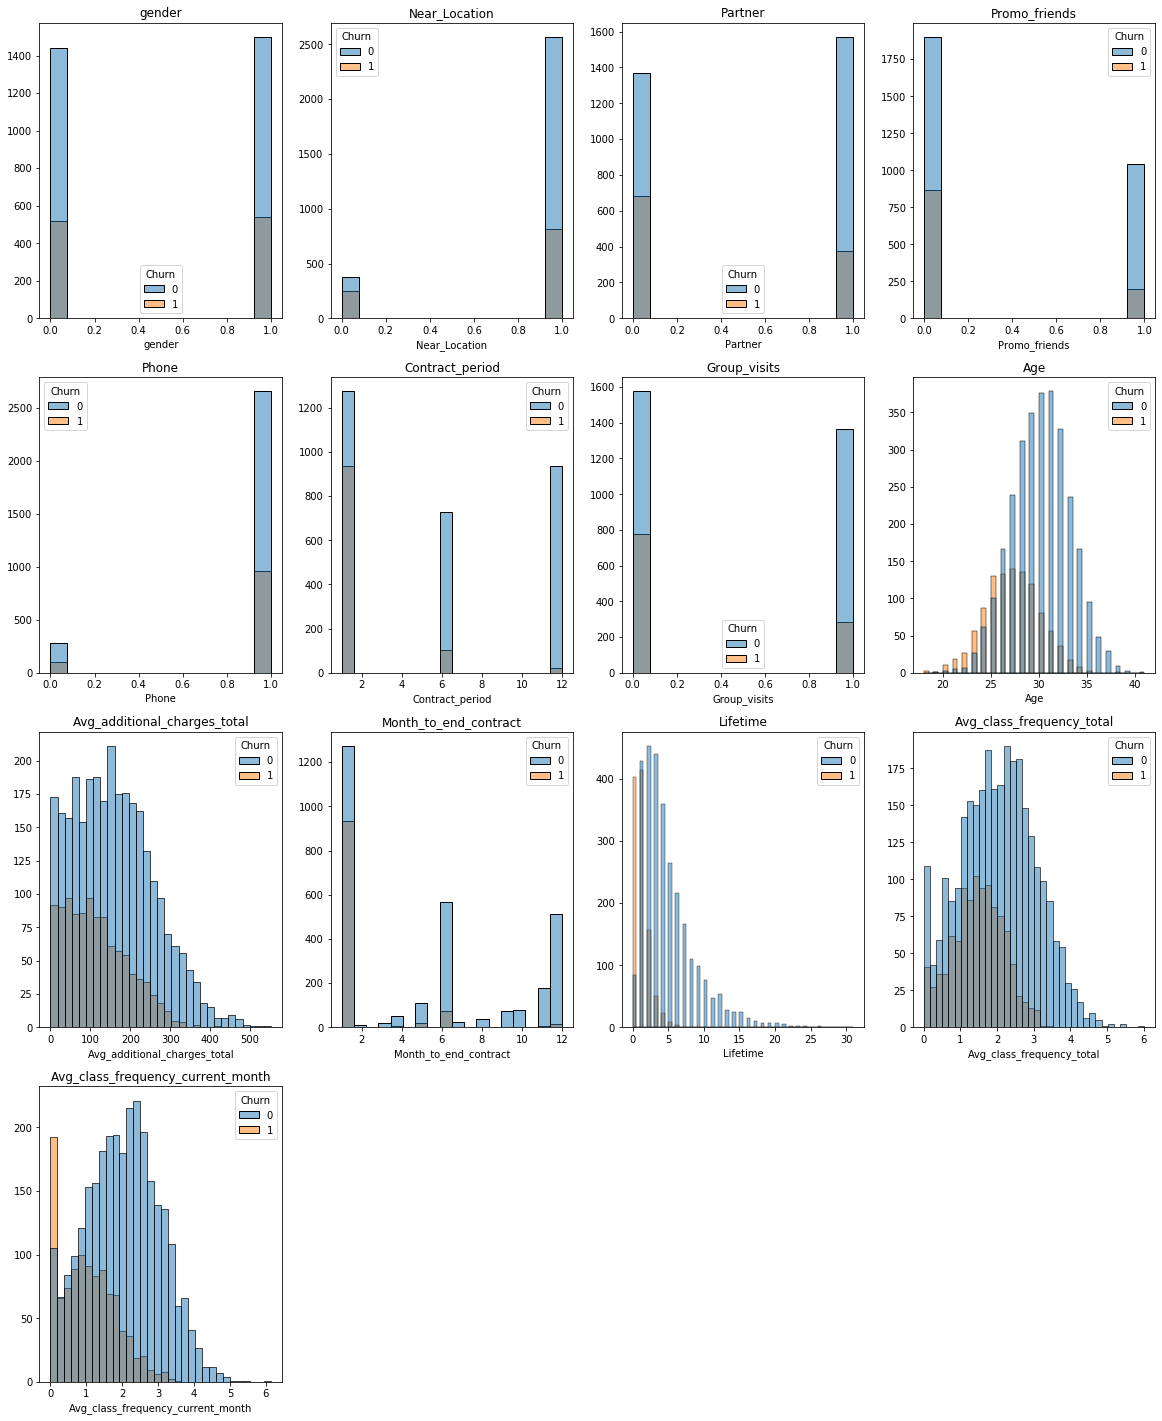

In [10]:
plt.figure(figsize=(20,25))
params = df.drop('Churn', axis = 1).columns

for i, param in enumerate(params):
    sns.histplot(data = df, x= param, hue = 'Churn', ax = plt.subplot(4,4, i+1))
    plt.title(f'{param}')
    plt.xlabel(param)
    plt.ylabel('')


**Conclusion**
- age - we have an almost equal number of women and men, the share of those who left is the same and does not depend on gender
- most of the clients live or work near the center, while the outflow of clients living in remoteness is much greater
- among the partners of the center there are fewer who left
- there are fewer people who came at the invitation of a friend, but they are better retained
- as noted, the fact that the client left his number does not affect the outflow
- we have only three types of contracts - for 1, 6 and 12 months - with an increase in the duration of the contract, the outflow of customers decreases
- there are more clients who prefer individual lessons, but there is also more outflow among them
- by age, it can be said that younger clients, under 25 years old, are kept worse. No data anomalies found
- with the growth of spending on additional services, customers flow out in smaller numbers. No anomalies found
- the closer the end date of the contract - the greater the likelihood of losing a client
- for clients visiting the center for less than 2 months, a very strong outflow is most characteristic
- we are also losing more clients visiting the center less frequently (once a week)

### Correlation matrix

In [11]:
df.corr().round(2)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.00,0.01,-0.01,-0.01,-0.01,0.00,0.02,0.01,-0.01,-0.00,0.01,0.01,0.01,0.00
Near_Location,0.01,1.00,-0.01,0.21,-0.02,0.15,0.15,0.06,0.04,0.14,0.07,0.04,0.06,-0.13
Partner,-0.01,-0.01,1.00,0.45,0.01,0.31,0.02,0.05,0.02,0.29,0.06,0.02,0.05,-0.16
Promo_friends,-0.01,0.21,0.45,1.00,0.00,0.24,0.12,0.05,0.04,0.24,0.07,0.03,0.05,-0.16
Phone,-0.01,-0.02,0.01,0.00,1.00,-0.01,-0.01,-0.01,0.01,-0.01,-0.02,0.01,0.01,-0.00
Contract_period,0.00,0.15,0.31,0.24,-0.01,1.00,0.17,0.14,0.11,0.97,0.17,0.10,0.16,-0.39
Group_visits,0.02,0.15,0.02,0.12,-0.01,0.17,1.00,0.08,0.03,0.16,0.08,0.06,0.08,-0.18
Age,0.01,0.06,0.05,0.05,-0.01,0.14,0.08,1.00,0.08,0.13,0.16,0.12,0.18,-0.40
Avg_additional_charges_total,-0.01,0.04,0.02,0.04,0.01,0.11,0.03,0.08,1.00,0.11,0.08,0.04,0.08,-0.20
Month_to_end_contract,-0.00,0.14,0.29,0.24,-0.01,0.97,0.16,0.13,0.11,1.00,0.16,0.09,0.15,-0.38


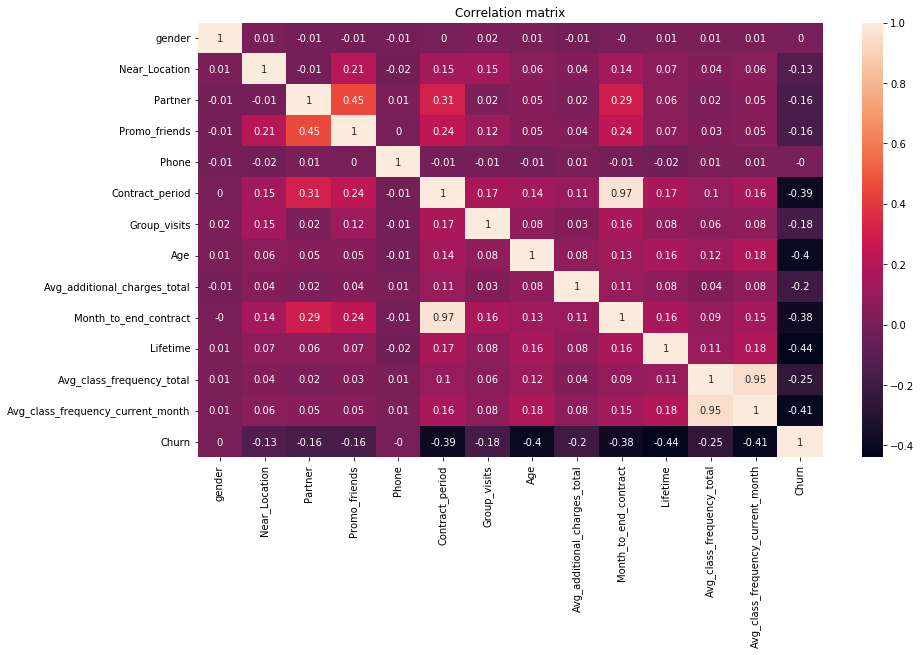

In [12]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr().round(2), annot = True, square=False)
plt.title('Correlation matrix');

**Conclusion**:

Target feature
- according to the correlation matrix, we do not see a strong correlation with the target feature Churn
- moderate negative correlation with contract duration, age, lifetime, number of months until the end of the contract and frequency of visits in the current month

Correlation between traits:
- there is a very strong positive correlation between the duration of the contract and the number of months until its completion
- there is a very strong positive correlation between the frequency of visits in the current month and the average frequency of visits for the entire period

## Churn Prediction Model

Let's build a model of binary classification of clients, where the target feature is the fact of the outflow of the client in the next month

In [13]:
X = df.drop(columns=['Churn'], axis = 1)
y = df['Churn']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [16]:
def show_metrics(name, mdl):
    mdl.fit(X_train_st, y_train)
    y_pred = mdl.predict(X_test_st)
    print("Model -", name)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy =",acc.round(3))
    precision = precision_score(y_test, y_pred).round(3)
    print("precision =", precision)
    recall = recall_score(y_test, y_pred).round(3)
    print("recall =", recall, '\n')

model = LogisticRegression(random_state=0)
show_metrics('"LogisticRegression"', model)

model = RandomForestClassifier(n_estimators = 100, random_state=0)
show_metrics('"RandomForest"', model)

Model - "LogisticRegression"
Accuracy = 0.928
precision = 0.878
recall = 0.815 



C:\Users\Utilisateur\anaconda3\envs\praktikum_env_win_new1\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


Model - "RandomForest"
Accuracy = 0.924
precision = 0.856
recall = 0.826 



C:\Users\Utilisateur\anaconda3\envs\praktikum_env_win_new1\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


## Client clustering

### Data standardization

In [17]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### Drawing a dendrogram

In [18]:
linked = linkage(X_sc, method = 'ward')

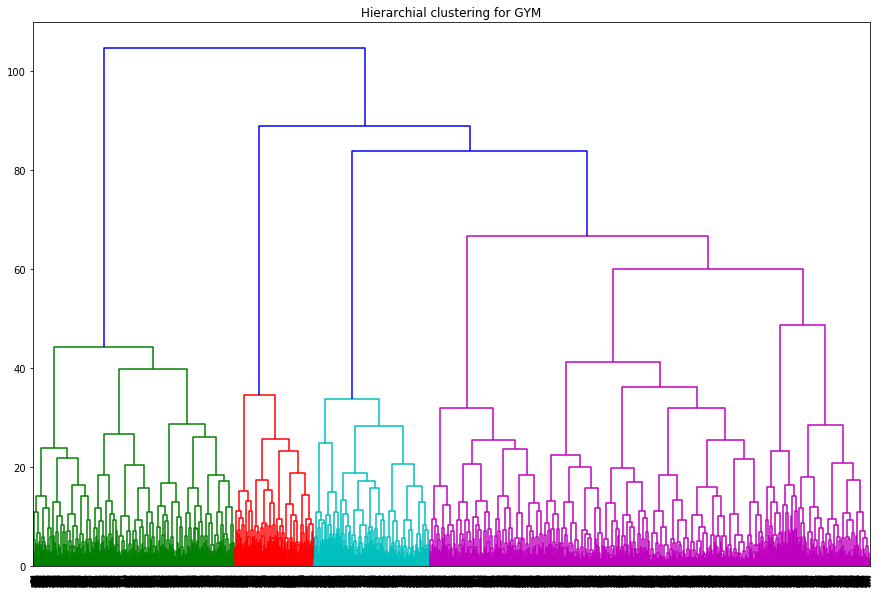

In [19]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

### Clustering based on the K-Means algorithm

In [20]:
km = KMeans(n_clusters = 5, random_state=0) 
labels = km.fit_predict(X_sc) 


In [21]:
df['cluster_km'] = labels
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0,3


In [22]:
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))

Silhouette_score: 0.14


### Mean values of features for clusters

In [23]:
df.groupby('cluster_km')[df.drop('cluster_km', axis = 1).columns].mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


**Conclusion**

- cluster 0 - for clients with long contracts (probably the majority in this cluster had a 12 month contract)
- cluster 1 is formed for users who did not leave a phone number
- cluster 2 - clients living or working away from the center
- cluster 3 - clients who visit the center very rarely (1 time per week and 1 time in the current month)
- cluster 4 - the most athletic clients - clients who visit the center most often

### Feature distributions for clusters

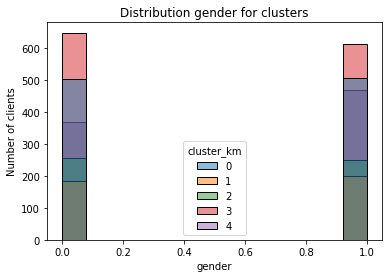

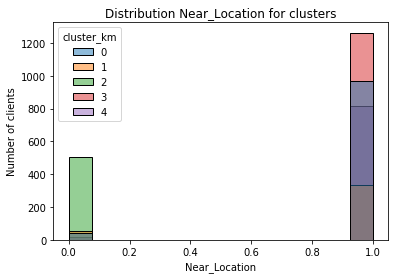

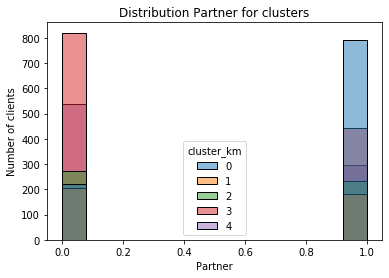

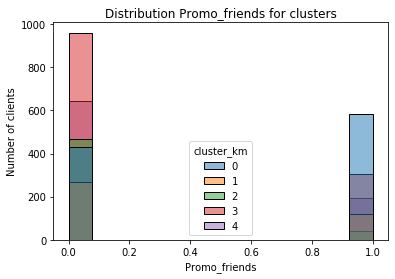

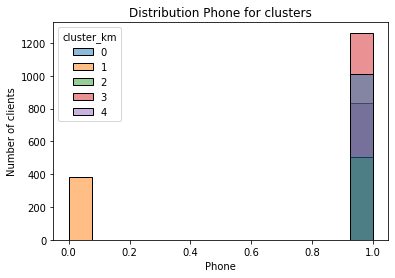

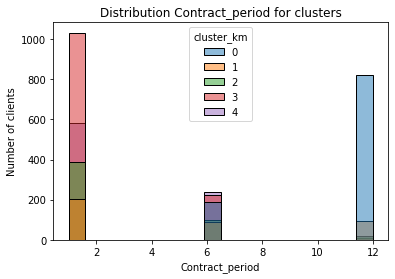

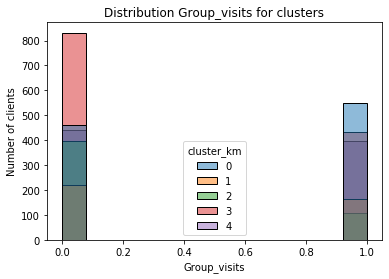

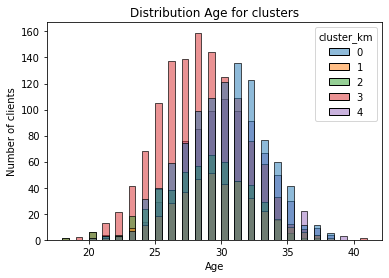

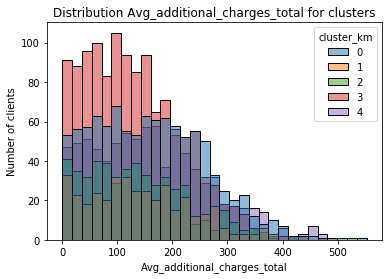

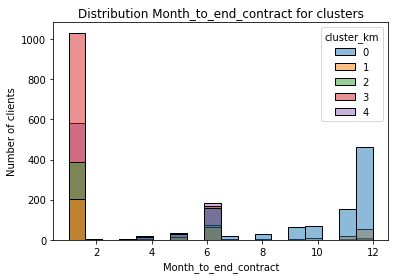

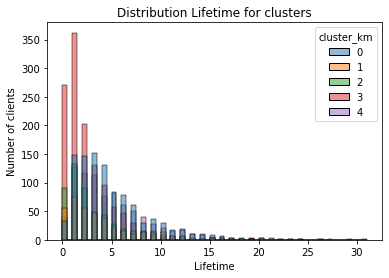

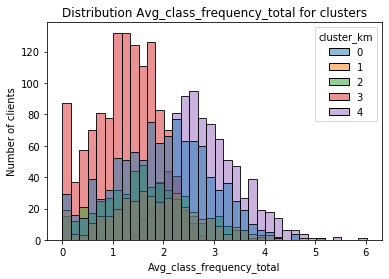

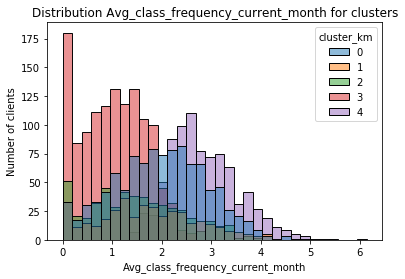

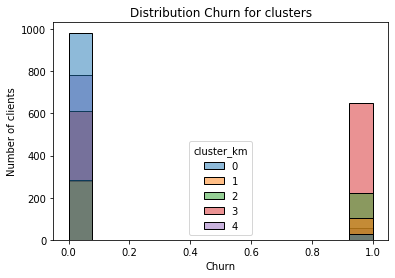

In [24]:
for column in df.drop('cluster_km', axis = 1).columns:
    sns.histplot(data=df, x=column, hue = 'cluster_km', palette="tab10")
    plt.title(f'Distribution {column} for clusters')
    plt.xlabel(column)
    plt.ylabel('Number of clients')
    plt.show()

**Conclusion**:
The following strong differences between clusters are observed
- by location - cluster 2 stands out strongly, the vast majority of whose clients live or work far from the center
- by phone numbers - cluster 1 selected - customers who did not leave their phone number
- by the duration of the contract and the number of months before its expiration - in fact, a cluster of clients with long-term contracts has been formed (mainly 12 months - cluster 0)
- according to the frequency of honoring the center - clusters 3 and 4 are singled out - with the lowest and highest frequencies of visits, respectively

### Share of churn by cluster

In [25]:
df.query('Churn==1').groupby('cluster_km')['Churn'].count() / df.query('Churn==1')['Churn'].count()

cluster_km
0    0.026390
1    0.097078
2    0.211122
3    0.611687
4    0.053723
Name: Churn, dtype: float64

**Conclusion**:
- the largest churn is observed for clients of the 3rd cluster - clients who visit the gym rarely - about once a week or once in the current month
- customers of clusters 0, 1 and 4 are well retained - churn is up to 10% - although the consistency of cluster 1 is still questionable (customers who did not leave a phone number), the results are justified for grades 0 and 4 - cluster 4 - active customers who often visit center, 0 cluster - clients with long-term contracts - for some, going to the center has become a habit and they are strongly involved in the product, for others, financial involvement comes first

## Conclusions and recommendations for working with clients

According to the results of the completed project:
- initial data - high-quality, homogeneous and ready for training models
- as a model for predicting the outflow of customers, a logistic regression model is recommended - giving greater accuracy, completeness and the proportion of correct answers compared to a random forest
- clients were clustered into 5 clusters based on the K-Means algorithm
cluster 0 - for clients with long contracts (most likely the majority in this cluster had a 12 month contract) - churn 2.6%
cluster 1 - formed for users who did not leave a phone number - outflow 9.7%
cluster 2 - clients living or working away from the center - churn 21.1%
cluster 3 - clients who visit the center very rarely (1 time per week and 1 time in the current month) - outflow 61.2%
cluster 4 - most athletic clients - clients who visit the center most often - churn 5.4%